In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/refs/heads/master/data/Advertising.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
print(data.shape)
data.head(10)

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


# <font color = '#3B9797'> Data Analysis

> Check null values in data, if null values are present, then try this-
> - First identify which columns have more null values
> - If any column have more than 15% of data missing then drop the entire column (why?)
> - Then check if we can drop the null values by rows (if we have less data then replace the null values)
> - If we have more data points then we can simply drop all the null values by rows

In [8]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

> Identify if the features are co-related to the target by visualisation

In [9]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
print(f'Loading the feature matrix with shape: {X.shape} and target vector with shape : {y.shape}')

Loading the feature matrix with shape: (200, 3) and target vector with shape : (200,)


>- first check if we have outliers in features
>- The nature of the data (distribution - histogram)
>- Co-relation of the feature with the target 
>- for co-relation (if both distributions are gaussian then use Pearson's co relation)
>- for co-relation (if both distributions are not gaussian then Spearman's co relation)
>- Co relation testing comes under statistical testing 
>- Statistical testing is of two types - parametric (Gaussian) and non parametric (Non Gaussian)
>- Pearson's is parametric & Spearman's is non parametric test

In [10]:
# from matplotlib.gridspec import GridSpec
# import warnings
# warnings.filterwarnings(action = 'ignore')
# plt.style.use('seaborn-v0_8-white')

# col = 'Newspaper'

# fig = plt.figure(layout="constrained")
# gs = GridSpec(7, 4, figure=fig)
# ax1 = fig.add_subplot(gs[:5, :2])
# ax2 = fig.add_subplot(gs[:5, 2:])
# ax3 = fig.add_subplot(gs[5:, :])

# sns.kdeplot(X[col], ax = ax1)
# ax1.set_yticks([])
# ax1.set_xticks([])

# sns.scatterplot(x = X[col], y = y, ax = ax2)
# ax2.set_yticks([])
# ax2.set_xticks([])

# sns.boxplot(x = X[col], ax = ax3)
# ax3.set_yticks([])
# ax3.set_xticks([])

# plt.tight_layout()

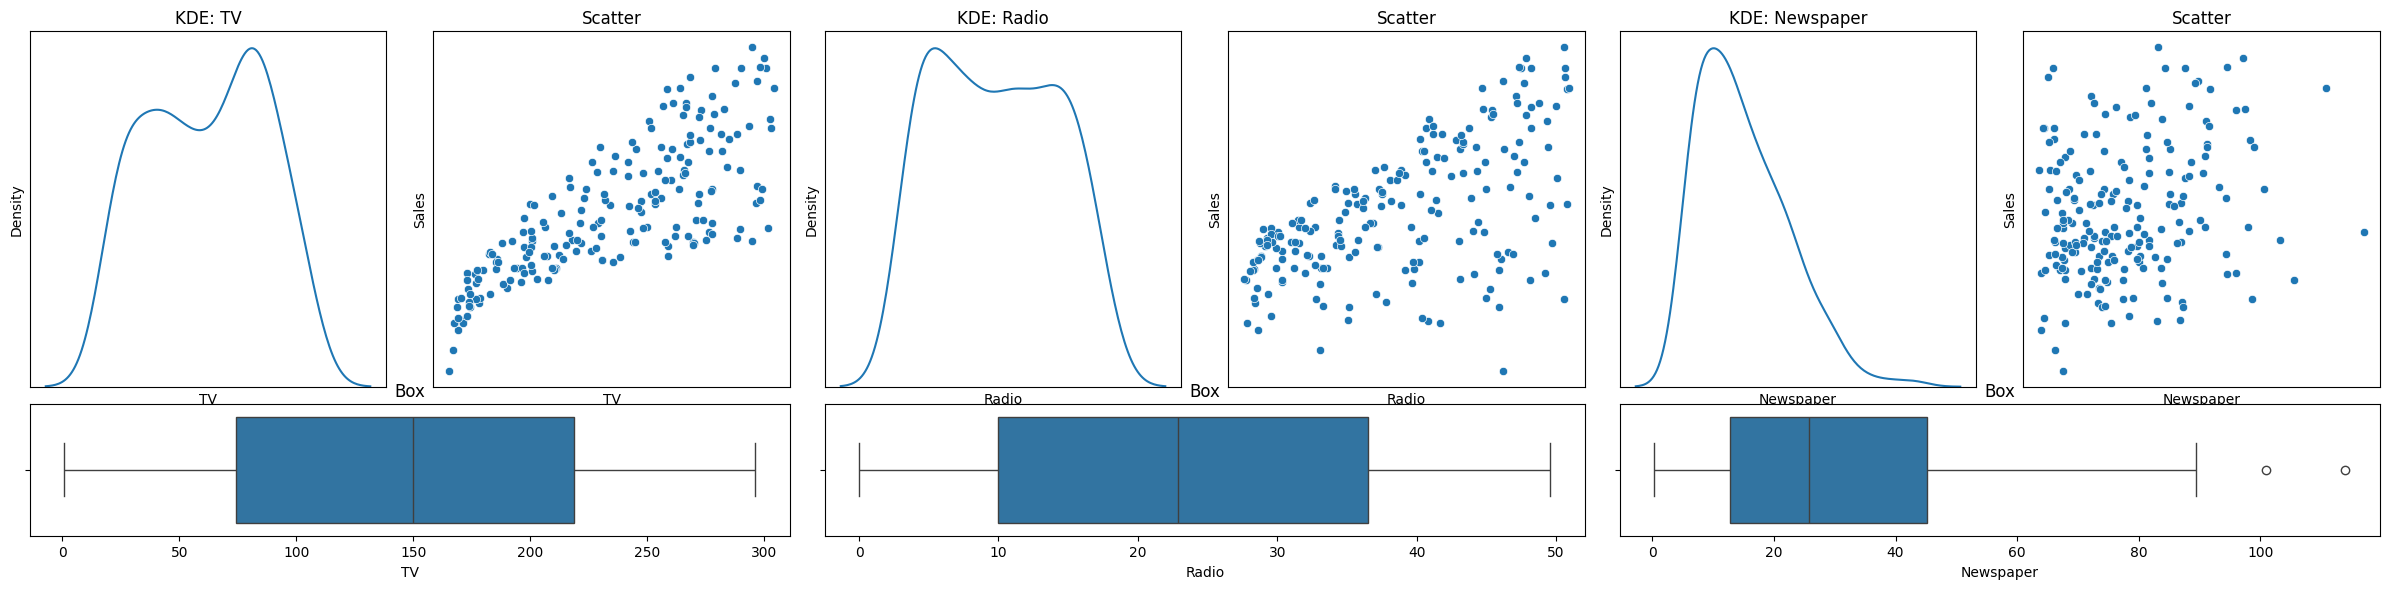

In [11]:
from matplotlib.gridspec import GridSpec
fig, axes = plt.subplots(1, 3, figsize = (24, 6))
for ax, col in zip(axes, X.columns):
    # Remove the original axes frame
    ax.remove()

    # Create sub-gridspec inside this subplot
    subgs = ax.get_subplotspec().subgridspec(
        7, 4, hspace=0.3, wspace=0.3
    )

    ax1 = fig.add_subplot(subgs[:5, :2])   # KDE
    ax2 = fig.add_subplot(subgs[:5, 2:])   # Scatter
    ax3 = fig.add_subplot(subgs[5:, :])    # Boxplot

    sns.kdeplot(X[col], ax=ax1)
    ax1.set_title(f"KDE: {col}")
    ax1.set_yticks([])
    ax1.set_xticks([])

    sns.scatterplot(x=X[col], y=y, ax=ax2)
    ax2.set_title("Scatter")
    ax2.set_yticks([])
    ax2.set_xticks([])

    sns.boxplot(x=X[col], ax=ax3)
    ax3.set_title("Box")

plt.tight_layout()
plt.show();

$$
\text{Sales} = \theta_0
+ \theta_1 \cdot \text{TV}
+ \theta_2 \cdot \text{Radio}
+ \theta_3 \cdot \text{Newspaper}
$$

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)

(160, 3) (160,)


In [93]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [94]:
print(model.coef_)
print(model.intercept_)

[ 0.04528557  0.19560366 -0.008446  ]
3.16633492910948


In [95]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.82276510528747


In [96]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv = 5)
print(scores.mean())

0.8871063495438436


In [52]:
f = X.values
t = y.values
n = np.ones((f.shape[0],1))
f = np.concatenate((n,f), axis = 1)
print(f.shape)
print(t[:,np.newaxis].shape)

(200, 4)
(200, 1)


In [54]:
temp1 = np.linalg.inv(np.matmul(f.T, f))
temp2 = np.matmul(f.T, t[:,np.newaxis])
theta = np.matmul(temp1, temp2)
theta

array([[ 2.93888937e+00],
       [ 4.57646455e-02],
       [ 1.88530017e-01],
       [-1.03749304e-03]])

In [60]:
input_values = np.array([1, 8.6, 2.1, 1])
pred = theta.flatten() * input_values
print(pred.sum())

3.727340862861621


In [65]:
print(y.shape)

(200,)


In [68]:
# error plot
print(theta.shape)
X_one = np.concatenate((np.ones_like(y).reshape(-1, 1), X.values), axis = 1)
print(X_one.shape)
y_pred = X_one @ theta
print(y_pred.shape)

(4, 1)
(200, 4)
(200, 1)


In [71]:
# MSE
mse = (1/len(y)) * ((y - y_pred.flatten()) ** 2).sum()
print(mse)

2.784126314510936


In [79]:
# import warnings
# warnings.filterwarnings(action = 'ignore')
# errors = (y - y_pred.flatten()) ** 2
# errors_norm = (errors - errors.mean())/errors.std()